<a href="https://colab.research.google.com/github/iust-deep-learning/tensorflow-2-tutorial/blob/master/part_03_model_design_apis/part_02_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow 2.0 Tutorial: Part #3


TensorFlow 2.0 Tutorial by IUST
*   Last Update: Dec 2019
*   Official Page: https://github.com/iust-deep-learning/tensorflow-2-tutorial





---




Please run the following cell before going through the rest of the tutorial.

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import numpy as np

from pprint import pprint

TensorFlow 2.x selected.


## High-level APIs

---



### Exercise #1: Product Review Classifier
Suppose that we have an online store (e.g., Amazon), and users can put a comment on products if they have bought them. Then, we want to find 1) whether the user would like to recommend the product 2) the sentiment of that review. Your model is given the title, the body, and the category of the review.
Here are the details of inputs and outputs:

Inputs
-  Title: Vectorized & padded input (can consist of multiple word)
-  Body: Vectorized & padded review content
-  Product Category: one category out of 12 (one-hot representation)

Output
-  Sentiment score: 3 possibilities (bad, medium, good)
-  Recommend: Wether the user recommends the product



In [0]:
num_categories = 12

title_input = ... # Variable-length sequence of ints
body_input = ... # Variable-length sequence of ints
cat_input = ... # One-hot representation (dtype=tf.float32)

encoded_title = ... # 100-d representation
encoded_body = ... # 100-d representation

output_sentiment = ... # Model prediction of sentiment
output_recom = ... # Model prediction of the user's recommendation status

model = ... # Final Model

In [0]:
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

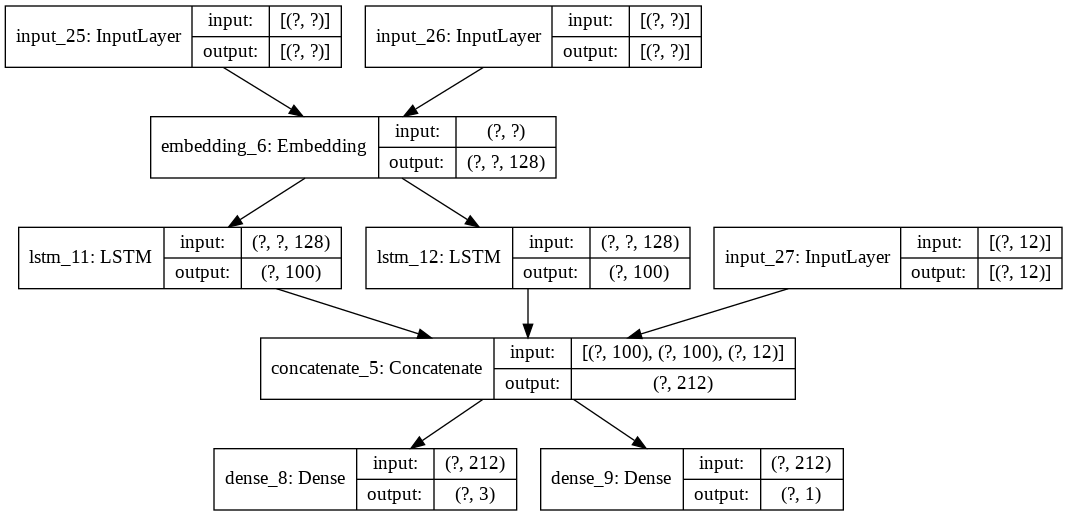

In [0]:
# Check yours against the following plot

### Exercise #2: Simulate 10 throwings of one die and one coin.
Another technique that originates from Computer Vision is called Max pooling. As you might remember, this technique reduces the impact of spatial information in the image. For example, If your CNN says, "Yay! I found a wheel at the position (x,y).", your Max-pooling will convert this sentence to "Yay! I found a wheel in this image."  Intuitively We can use the max-pooling procedure in any configuration beside an image. Here is an example of Max-pooling application in recurrent networks:

<p align="center"><img src="https://iust-deep-learning.github.io/972/static_files/assignments/asg05_assets/05_rnn_max_pooling.png" width="450" />   
</p>
<p align="center">Max-pooling through an RNN's hidden states.  </p>

In this setup, we'd like to perform max-pooling over the hidden states $\hat{h} = MaxPool([h^{(1)}, ..., h^{(n)}])$ where $\hat{h}$ is the max-pooled version. Every dim of $\hat{h}$ is the maximum of that particular dim across all of the hidden states.

$$
\hat{h}_i =\max_{1\le k \le n} h^{(k)}_i
$$

Although the default Keras framework provides the implementation, it lacks the masking support. Implement this mechanism as a Keras layer.

In [0]:
class MaskedGlobalMaxPooling1D(tf.keras.layers.Layer):
  def call(self, inputs, mask=None):
    """
    Args:
      inputs (Tensor(dtype=float32)): shape = [batch, timesteps, featurs]
      mask (Tensor(dtype=bool)): shape = [batch, timesteps]
      
    Returns
      output (Tensor(dtype=float32)): shape = [batch, features]
      
    Hint: tf.where, tf.tile, tf.math.reduce_max could be helpful.
    """
    output = None

    ########################################
    #     Put your implementation here     #
    ########################################
    
    return output

Test your implementation

In [0]:
import numpy as np

seq = tf.constant( [ 
    [[1, 3],
     [4, -2],
     [0, 11]],
    
    [[9, -3],
     [8, -2],
     [100, -5]]
], dtype=tf.float32)
mask = tf.constant([
    [True, True, True],
    [True, True, False]
], dtype=tf.bool)

max_pooled = MaskedGlobalMaxPooling1D()(seq, mask=mask)

print(max_pooled)
assert np.all(max_pooled.numpy() == np.array([[ 4., 11.],
       [ 9., -2.]]))
print("Passed!")

Solution:

In [0]:
#@title

class MaskedGlobalMaxPooling1D(tf.keras.layers.Layer):
  def call(self, inputs, mask=None):
    """
    Args:
      inputs (Tensor(dtype=float32)): shape = [batch, timesteps, featurs]
      mask (Tensor(dtype=bool)): shape = [batch, timesteps]
      
    Returns
      output (Tensor(dtype=float32)): shape = [batch, features]
      
    Hint: tf.where, tf.tile, tf.math.reduce_max could be helpful.
    """
    
    ########################################
    #     Put your implementation here     #
    ########################################
    
    output = None
    
    if mask is not None:
      mask = tf.expand_dims(mask, -1)
      mask = tf.tile(mask, [1, 1, inputs.shape[-1]])
      inputs = tf.where(mask, inputs, tf.ones_like(inputs)*-1e10)
    
    output = tf.math.reduce_max(inputs, axis=1)
    
    return output

## References


---





*   Broadcasting in Python https://www.youtube.com/watch?v=tKcLaGdvabM
*   https://colab.research.google.com/notebooks/mlcc/creating_and_manipulating_tensors.ipynb#scrollTo=ocwT0iXH-nhT
*   https://tensorflow.org
*   http://web.stanford.edu/class/cs20si/

